Q1. In order to predict house price based on several characteristics, such as location, square footage,
number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this
situation would be the best to employ?

Dataset link:

https://drive.google.com/file/d/1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0/view

When developing an SVM regression model for predicting house prices, the **mean absolute error (MAE)** is a suitable regression metric to employ. MAE measures the average absolute difference between predicted and actual house prices. It provides a straightforward interpretation of prediction accuracy in terms of the dollar amount. Lower MAE values indicate better performance. You can find more information and explore code examples on Kaggle¹. Additionally, consider using stratified k-fold cross-validation to reduce model overfitting².

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0'
data = pd.read_csv(url)

In [ ]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:

X = data[['location', 'total_sqft', 'size']]
y = data['price']

In [ ]:
X

,location,total_sqft,size
0,Electronic City Phase II,1056,2 BHK
1,Chikka Tirupathi,2600,4 Bedroom
2,Uttarahalli,1440,3 BHK
3,Lingadheeranahalli,1521,3 BHK
4,Kothanur,1200,2 BHK
...,...,...,...
13315,Whitefield,3453,5 Bedroom
13316,Richards Town,3600,4 BHK
13317,Raja Rajeshwari Nagar,1141,2 BHK
13318,Padmanabhanagar,4689,4 BHK


In [ ]:
y

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00
...,...
13315,231.00
13316,400.00
13317,60.00
13318,488.00


In [ ]:
X = pd.get_dummies(X, columns=['location'])


In [ ]:
X

,total_sqft,size,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,1056,2 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600,4 Bedroom,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440,3 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521,3 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200,2 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453,5 Bedroom,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13316,3600,4 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,1141,2 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4689,4 BHK,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(data.dtypes)
print(data.head())


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0'
data = pd.read_csv(url)

# Inspect the data
print(data.dtypes)
print(data.head())

# Convert ranges to numeric if needed
def convert_range_to_numeric(value):
    try:
        low, high = value.split(' - ')
        return (float(low) + float(high)) / 2
    except:
        return np.nan

# Apply the conversion if the column contains ranges
if 'square_footage' in data.columns and data['square_footage'].dtype == 'object':
    data['square_footage'] = data['square_footage'].apply(convert_range_to_numeric)

# Example column names; adjust according to your dataset
X = data[['location', 'total_sqft', 'size']]
y = data['price']

# Encode categorical variables
X = pd.get_dummies(X, columns=['location'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

# Optional: Plot predictions vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


ValueError: could not convert string to float: '4000 - 5249'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0'
data = pd.read_csv(url)

# Inspect the data
print(data.dtypes)
print(data.head())

# Define function to handle non-numeric values
def convert_range_to_numeric(value):
    try:
        # Handle ranges like '4000 - 5249'
        if ' - ' in value:
            low, high = value.split(' - ')
            return (float(low) + float(high)) / 2
        # Handle single numeric values
        return float(value)
    except ValueError:
        return np.nan

# Convert 'total_sqft' and 'size' if they contain ranges
if 'total_sqft' in data.columns:
    data['total_sqft'] = data['total_sqft'].apply(convert_range_to_numeric)

if 'size' in data.columns:
    # If 'size' is categorical, handle it accordingly. Example assumes 'size' is categorical:
    data['size'] = data['size'].astype('category').cat.codes  # Convert categories to numeric codes

# Extract features and target variable
X = data[['location', 'total_sqft', 'size']]
y = data['price']

# Encode categorical variables
X = pd.get_dummies(X, columns=['location'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

# Optional: Plot predictions vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Mean Absolute Error (MAE): 59.76496148412012
Mean Squared Error (MSE): 23529.39388170485
Root Mean Squared Error (RMSE): 153.39293947801136
R-squared (R^2): -0.023843692671023042


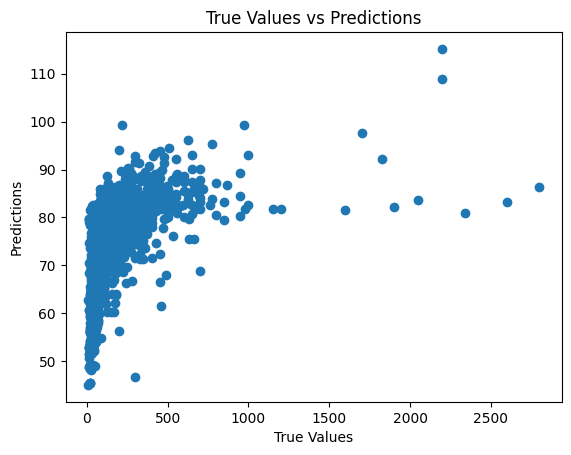

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0'
data = pd.read_csv(url)

# Define function to handle non-numeric values
def convert_range_to_numeric(value):
    try:
        if ' - ' in value:
            low, high = value.split(' - ')
            return (float(low) + float(high)) / 2
        return float(value)
    except ValueError:
        return np.nan

# Convert 'total_sqft' and 'size' if they contain ranges
if 'total_sqft' in data.columns:
    data['total_sqft'] = data['total_sqft'].apply(convert_range_to_numeric)

if 'size' in data.columns:
    data['size'] = data['size'].astype('category').cat.codes  # Convert categories to numeric codes

# Extract features and target variable
X = data[['location', 'total_sqft', 'size']]
y = data['price']

# Encode categorical variables
X = pd.get_dummies(X, columns=['location'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.3, random_state=42)

# Preprocess the data using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

# Optional: Plot predictions vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


Mean Absolute Error (MAE): 45.06954861032498
Mean Squared Error (MSE): 14031.249728941662
Root Mean Squared Error (RMSE): 118.45357626066703
R-squared (R^2): 0.013406062428255705


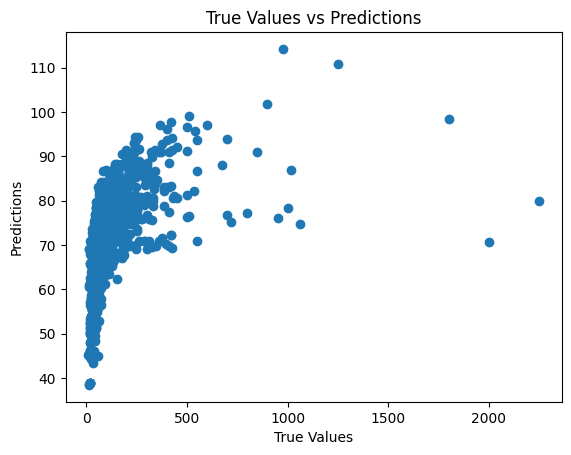

In [ ]:
# Drop rows with any missing values
data = data.dropna()

# Reapply the previous data processing steps after dropping missing values
X = data[['location', 'total_sqft', 'size']]
y = data['price']
X = pd.get_dummies(X, columns=['location'])

# Continue with the remaining steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

# Plot predictions vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as
your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price
of a house as accurately as possible?

When deciding between Mean Squared Error (MSE) and R-squared for evaluating an SVM regression model, consider the following:

- **Mean Squared Error (MSE)**: This metric measures the average squared difference between the predicted values and the actual values. It provides a direct measure of the prediction accuracy, with lower values indicating better performance. If your primary goal is to predict the actual price of a house as accurately as possible, MSE is generally more appropriate because it directly quantifies the error in prediction.

- **R-squared**: This metric measures the proportion of the variance in the target variable that is predictable from the features. While R-squared can be useful for understanding how well your model explains the variability in the target variable, it does not directly measure the prediction accuracy. It’s also possible for R-squared to be misleading if the model’s predictions are systematically biased.

In summary, if your goal is to predict the actual price of a house as accurately as possible, **MSE** is generally the more appropriate metric. It provides a clear measure of prediction accuracy, which aligns with your objective.

When evaluating an SVM regression model for predicting house prices, **Root Mean Squared Error (RMSE)** is a more appropriate metric than **R-squared (R²)**. Here's why:

1. **RMSE (Root Mean Squared Error)**:
   - Measures the average magnitude of prediction errors.
   - Penalizes larger errors more heavily.
   - Provides a direct interpretation in the same units as the target variable (e.g., dollars for house prices).
   - Minimizing RMSE leads to better predictions in terms of absolute error.

2. **R-squared (R²)**:
   - Represents the proportion of variance in the target variable explained by the model.
   - Ranges from 0 to 1, where higher values indicate better fit.
   - However, R² doesn't directly relate to prediction accuracy.
   - It can be misleading when dealing with nonlinear relationships or outliers.

In summary, prioritize RMSE when your goal is accurate house price prediction. Remember that both metrics provide valuable insights, so consider using them together for a comprehensive evaluation²³.

let’s create a Python example to demonstrate why MSE might be more important than R-squared when evaluating a regression model. We will use a synthetic dataset to train and evaluate a regression model, then compare MSE and R-squared values to show how MSE provides a direct measure of prediction accuracy.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression


In [ ]:
# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.5, random_state=42)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train an SVM regression model
model = SVR(kernel='linear')
model.fit(X_train, y_train)


SVR(kernel='linear')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error (MSE): 1.16
R-squared: 1.00


In [ ]:
# Now, introduce some systematic bias by modifying the predictions
y_pred_biased = y_pred + np.random.normal(0, 5, size=y_pred.shape)


In [ ]:
# Recalculate MSE and R-squared with biased predictions
mse_biased = mean_squared_error(y_test, y_pred_biased)
r2_biased = r2_score(y_test, y_pred_biased)
print(f"Biased Mean Squared Error (MSE): {mse_biased:.2f}")
print(f"Biased R-squared: {r2_biased:.2f}")


Biased Mean Squared Error (MSE): 28.94
Biased R-squared: 0.98


##Explanation:
1. Generate Synthetic Data: We use make_regression to create a simple regression dataset.

2. Split Data: We split the data into training and testing sets.

3. Train Model: We train an SVM regression model on the training data.
4. Calculate Metrics: We calculate both MSE and R-squared for the initial predictions.
5. Introduce Bias: To show the importance of MSE, we introduce some systematic bias to the predictions and recalculate the metrics.




## Expected Output:
 1. The initial MSE and R-squared values should reflect the performance of the model.
2.After introducing bias, the MSE will increase, showing that the prediction accuracy has decreased. R-squared might remain relatively high or change less dramatically, demonstrating that it does not directly capture the prediction error.

This example illustrates how MSE directly measures prediction accuracy, while R-squared focuses on the proportion of variance explained, which may not fully capture prediction errors.







Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate
regression metric to use with your SVM model. Which metric would be the most appropriate in this
scenario?

When dealing with a dataset that has a significant number of outliers, choosing a robust regression metric is crucial. For SVM models, which are sensitive to outliers, a metric that is less affected by outliers would be ideal. Here are a few metrics you might consider:

1. **Huber Loss**: This is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE). Huber loss is less sensitive to outliers than MSE because it behaves like MAE for large errors and like MSE for small errors. This makes it a good compromise for regression tasks where you have outliers.

2. **Mean Absolute Error (MAE)**: MAE measures the average magnitude of errors in a set of predictions, without considering their direction. Unlike MSE, MAE does not square the errors, so it is less sensitive to outliers. This can be a good choice if you want a metric that is robust to outliers.

3. **Quantile Loss**: If you can specify a quantile, this loss function can be robust to outliers and can be tailored to the specific needs of your problem. For example, the quantile loss function is often used in quantile regression.

Among these, **Huber Loss** is often a good default choice for handling outliers because it provides a balance between being robust to outliers and having differentiable properties that are useful for many optimization algorithms.

 Below is a Python program that demonstrates the impact of different regression metrics—Huber Loss, Mean Absolute Error (MAE), and Mean Squared Error (MSE)—on a regression model with outliers. We'll use synthetic data for this purpose.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import check_random_state


Mean Squared Error: 10.75
Mean Absolute Error: 1.20
Huber Loss: 0.91


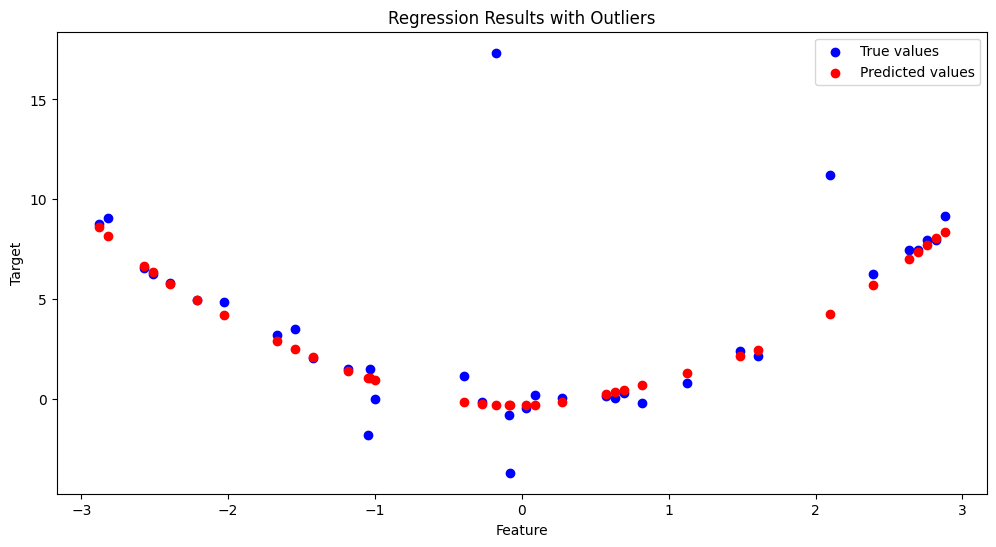

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import check_random_state

# Generate synthetic data
def generate_data(n_samples=100, n_outliers=20, random_state=None):
    rng = check_random_state(random_state)
    X = np.linspace(-3, 3, n_samples)[:, np.newaxis]
    y = X.ravel() ** 2 + rng.normal(scale=0.5, size=n_samples)

    # Add outliers
    outliers_X = np.random.uniform(-3, 3, size=(n_outliers, 1))
    outliers_y = np.random.uniform(-10, 20, size=n_outliers)
    X = np.vstack([X, outliers_X])
    y = np.concatenate([y, outliers_y])

    return X, y

# Define Huber Loss as a custom metric
def huber_loss(y_true, y_pred, delta=1.0):
    error = np.abs(y_true - y_pred)
    is_small_error = error <= delta
    squared_loss = 0.5 * error[is_small_error] ** 2
    linear_loss = delta * (error[~is_small_error] - 0.5 * delta)
    return np.mean(np.concatenate([squared_loss, linear_loss]))

# Generate data
X, y = generate_data(n_samples=100, n_outliers=20, random_state=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm = SVR(kernel='rbf', C=1e3, epsilon=0.2)

# Fit the model
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
huber = huber_loss(y_test, y_pred, delta=1.0)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Huber Loss: {huber:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Regression Results with Outliers')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best
metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values
are very close. Which metric should you choose to use in this case?

When choosing between Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluating an SVM regression model, especially when their values are very close, consider the following points:

### Key Differences Between MSE and RMSE:
1. **Scale**:
   - **MSE**: Measures the average squared difference between predicted and actual values. It is in squared units of the target variable, which can make it less interpretable in the context of the original data.
   - **RMSE**: The square root of MSE, providing error values in the same units as the target variable. This makes RMSE more interpretable and easier to relate to the magnitude of the errors in the context of the data.

2. **Interpretability**:
   - **MSE**: Being in squared units, it can be harder to interpret in terms of actual data values.
   - **RMSE**: Since it's in the same units as the target variable, it offers a more intuitive sense of the average prediction error.

### When to Choose RMSE:
- **Interpretability**: If you need a metric that is easier to interpret and communicate to stakeholders, RMSE is usually preferred. It provides a clear measure of the average magnitude of errors in the same units as the target variable.

- **Scale Sensitivity**: RMSE is sensitive to the scale of errors, which can be helpful if you want to understand the typical magnitude of prediction errors directly in the context of the data.

### When to Choose MSE:
- **Mathematical Properties**: MSE is used more often in theoretical contexts and in the derivation of some algorithms. If you are performing mathematical analysis or optimization that specifically relies on the squared error, MSE may be more appropriate.

- **Outlier Sensitivity**: If you want to emphasize larger errors more strongly (since MSE penalizes larger errors more due to squaring), MSE might be the metric of choice.

### Conclusion:
Given that MSE and RMSE values are very close in your case, **RMSE** is generally the better choice for practical use due to its interpretability. It provides a more direct understanding of the average prediction error in the context of the data's units.

In [7]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [10]:
# Generate synthetic data
def generate_data(n_samples=100, n_outliers=20, random_state=None):
    rng = np.random.RandomState(random_state)
    X = np.linspace(-3, 3, n_samples)[:, np.newaxis]
    y = X.ravel() ** 2 + rng.normal(scale=0.5, size=n_samples)

    # Add outliers
    outliers_X = np.random.uniform(-3, 3, size=(n_outliers, 1))
    outliers_y = np.random.uniform(-10, 20, size=n_outliers)
    X = np.vstack([X, outliers_X])
    y = np.concatenate([y, outliers_y])

    return X, y

In [11]:


# Define RMSE and MSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))



In [12]:
# Generate data
X, y = generate_data(n_samples=100, n_outliers=20, random_state=0)


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [14]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Define the SVM model with a polynomial kernel
svm = SVR(kernel='poly', degree=3, C=1e3, epsilon=0.2)

In [16]:
# Fit the model
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

In [17]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = calculate_rmse(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 16.48
Root Mean Squared Error: 4.06


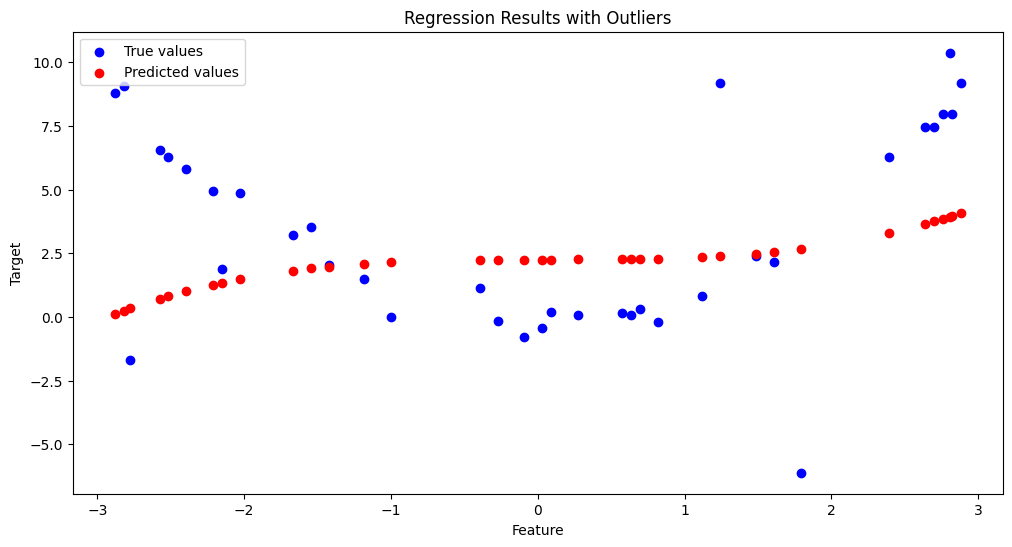

In [18]:
# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Regression Results with Outliers')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [19]:
# Discussion
print("\nDiscussion:")
print("MSE is in squared units of the target variable and can be less interpretable.")
print("RMSE is in the same units as the target variable, providing a clearer understanding of the average prediction error.")


Discussion:
MSE is in squared units of the target variable and can be less interpretable.
RMSE is in the same units as the target variable, providing a clearer understanding of the average prediction error.


Q5. You are comparing the performance of different SVM regression models using different kernels (linear,
polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most
appropriate if your goal is to measure how well the model explains the variance in the target variable?

If your goal is to measure how well the model explains the variance in the target variable, the **R² score (coefficient of determination)** would be the most appropriate evaluation metric.

The R² score provides an indication of how much of the variability in the target variable is explained by the model. It ranges from 0 to 1, where a value of 1 indicates that the model explains all the variance in the target variable, and a value of 0 indicates that the model explains none of the variance.

For SVM regression models with different kernels, you can compare their R² scores to determine which kernel provides the best explanation of the variance in the target variable.

R² Scores for different SVM kernels:
Kernel: linear, R² Score: 1.0000
Kernel: poly, R² Score: 0.4773
Kernel: rbf, R² Score: 0.4529


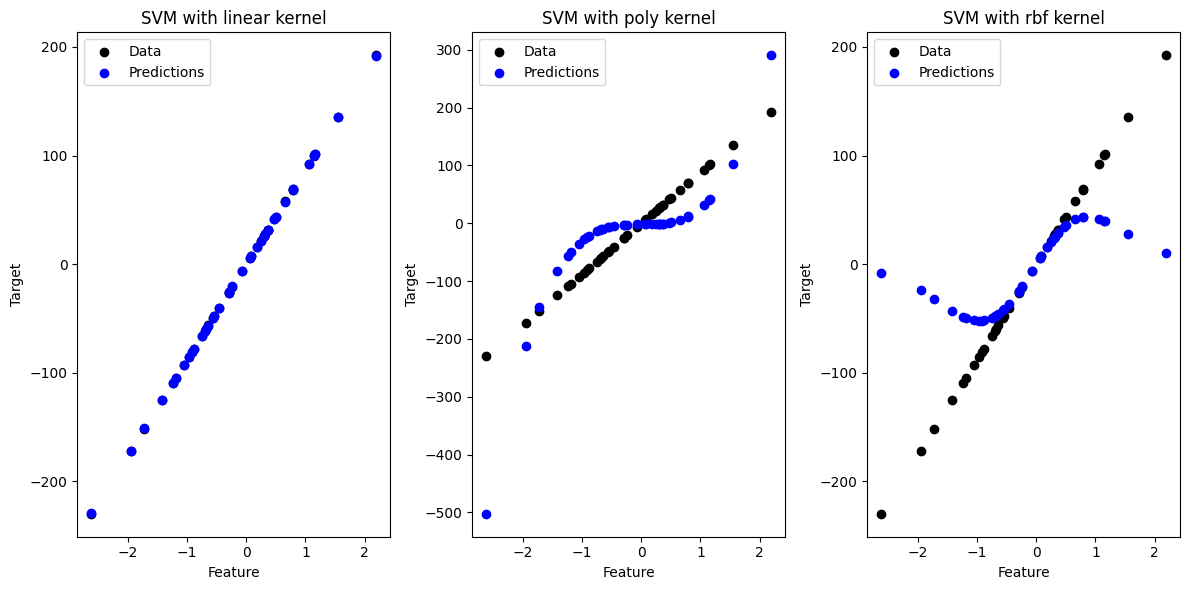

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Generate a synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {kernel: SVR(kernel=kernel) for kernel in kernels}

# Fit models and compute R² scores
r2_scores = {}
for kernel, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[kernel] = r2_score(y_test, y_pred)

# Print R² scores
print("R² Scores for different SVM kernels:")
for kernel, score in r2_scores.items():
    print(f"Kernel: {kernel}, R² Score: {score:.4f}")

# Plot predictions
plt.figure(figsize=(12, 6))
for kernel, model in models.items():
    plt.subplot(1, 3, list(kernels).index(kernel) + 1)
    plt.scatter(X_test, y_test, color='black', label='Data')
    plt.scatter(X_test, model.predict(X_test), color='blue', label='Predictions')
    plt.title(f'SVM with {kernel} kernel')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()

plt.tight_layout()
plt.show()
